In [1]:
from model import CNN, shallow_CNN, deep_CNN
from pathlib import Path
import torchaudio
import numpy as np
import torch
import matplotlib.pyplot as plt


# Music Visulization

In [22]:
music_file_path = Path('/home/siyuan/class/cmsc734/sound_vis/test.mp3')
model_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/best_model.ckpt')

if not music_file_path.exists():
    raise ValueError('Music file does not exist')
if not model_path.exists():
    raise ValueError('Model file does not exist')


In [23]:
def adjust_audio_length(wav, num_samples, num_chunks):
    hop = (len(wav) - num_samples) // num_chunks
    wav = np.array([wav[i * hop : i * hop + num_samples] for i in range(num_chunks)])
    return wav

In [24]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)


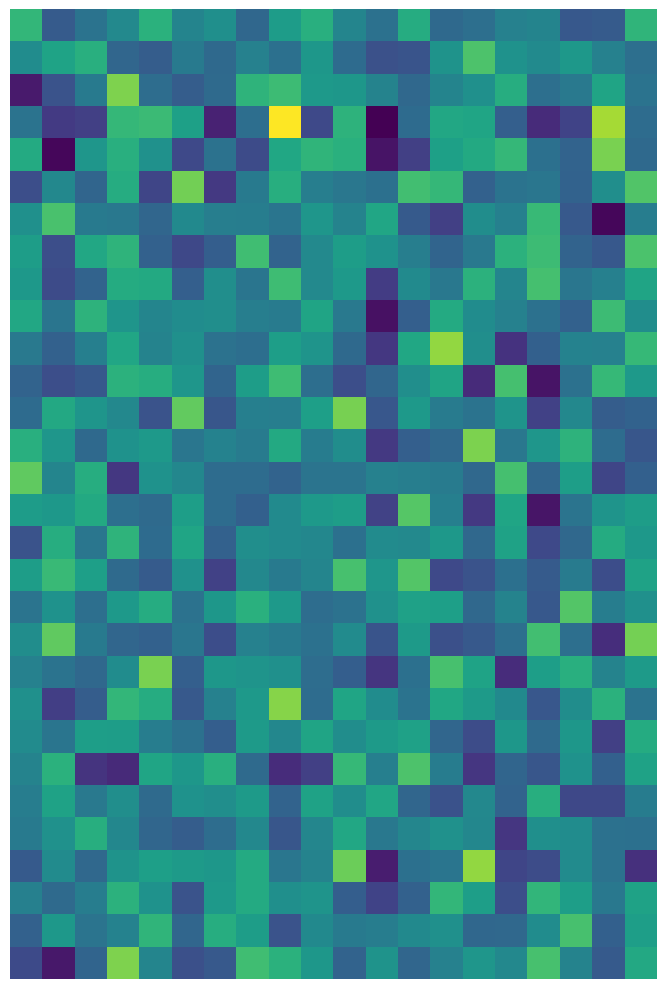

In [25]:
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy()
    feature_maps = np.reshape(feature_maps, (30, 20)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()
    break

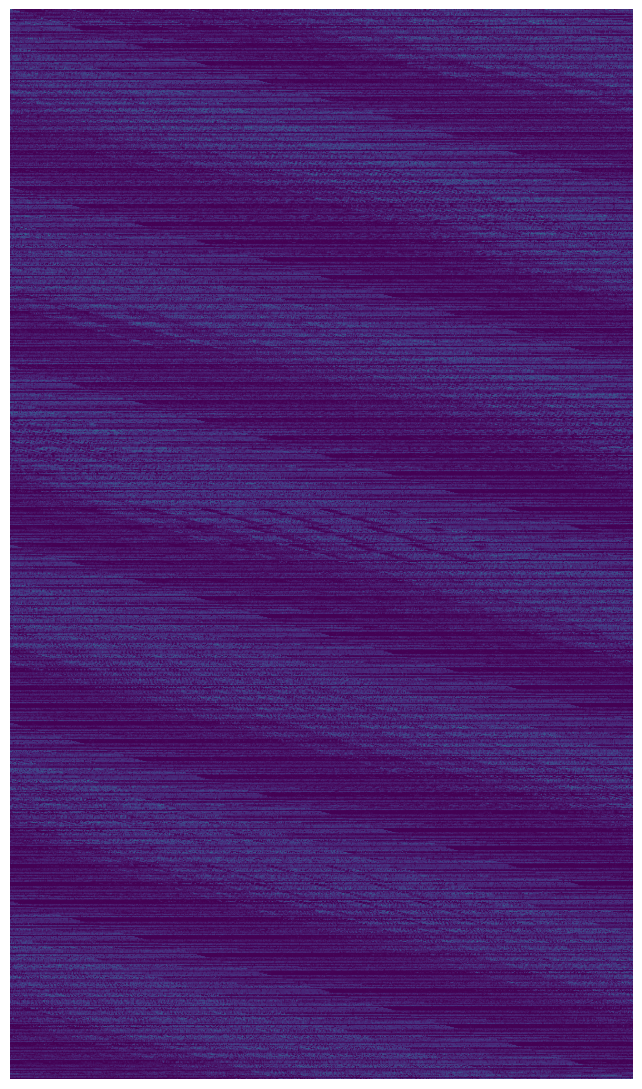

In [26]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = shallow_CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy().flatten()
    feature_maps = np.reshape(feature_maps, (1926,1120)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(19, 11))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break

# Sound Visulization

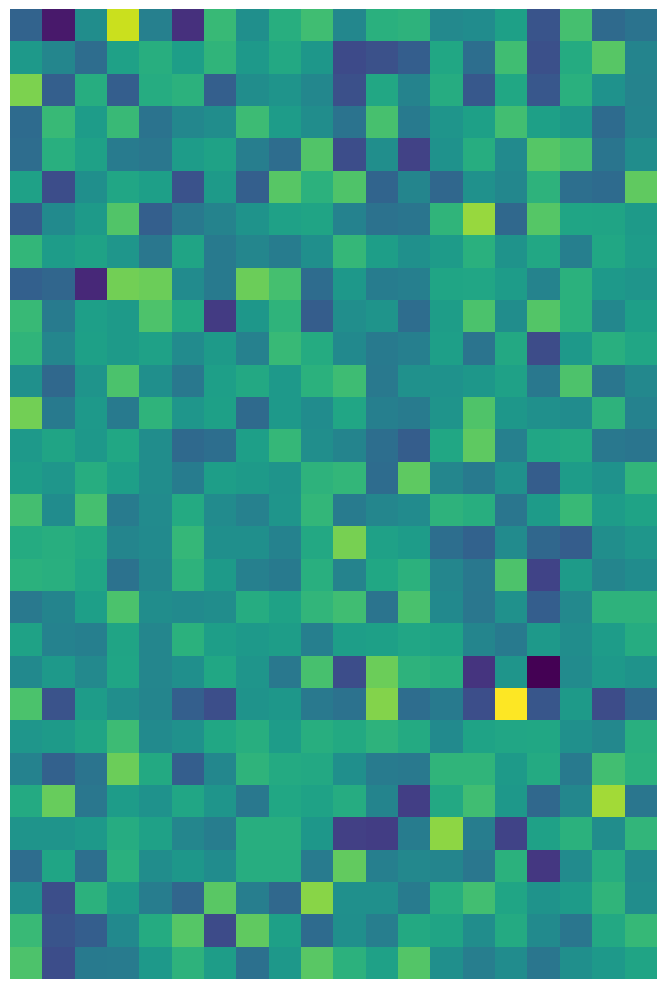

In [27]:
music_file_path = Path('/home/siyuan/class/cmsc734/sound_vis/01-White-Noise-10min.mp3')
model_path = Path('/home/siyuan/class/cmsc734/sound_vis/deep_model/best_model.ckpt')

if not music_file_path.exists():
    raise ValueError('Music file does not exist')
if not model_path.exists():
    raise ValueError('Model file does not exist')

num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)

for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy()
    feature_maps = np.reshape(feature_maps, (30, 20)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break

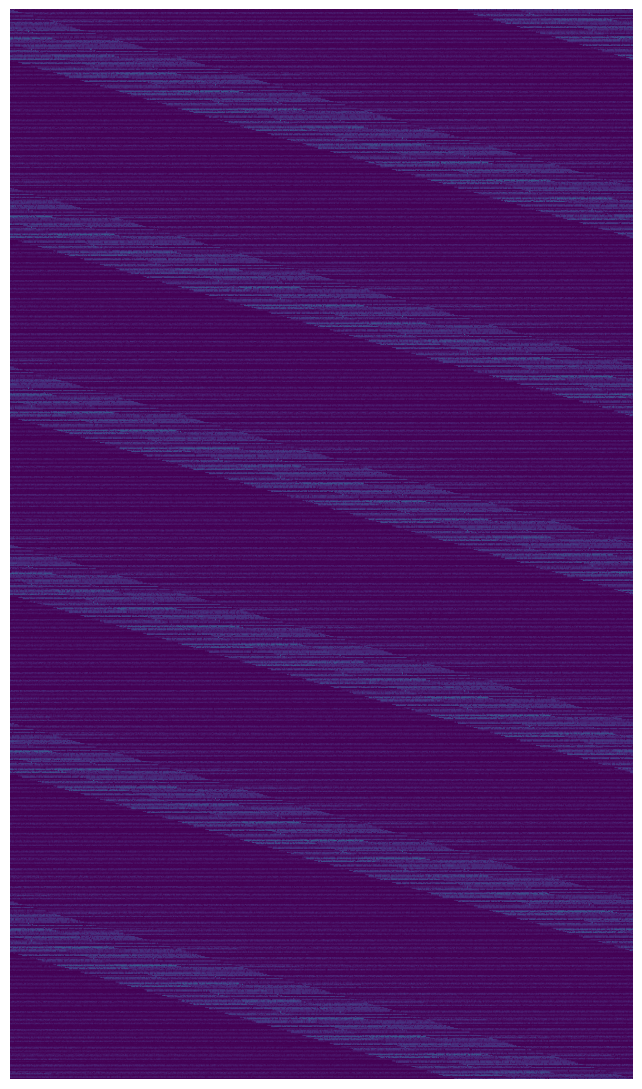

In [29]:
num_sec= 30
num_samples = 22050 * num_sec  # 2 seconds
num_chunks = 60


net = shallow_CNN()
net.load_state_dict(torch.load(model_path))

waveform, sr = torchaudio.load(music_file_path)  
waveform = waveform.mean(dim=0)  # Convert to mono by averaging the channels  

wav = waveform.squeeze().numpy()
# adjust audio length
wav_chunks = adjust_audio_length(wav,num_samples=num_samples, num_chunks=num_chunks ).astype('float32')
wav_chunks = torch.from_numpy(wav_chunks).unsqueeze(0)
for i, data in enumerate(wav_chunks):
    output = net(data)
    feature_maps = output.detach().numpy().flatten()
    feature_maps = np.reshape(feature_maps, (1926,1120)) 
    # plot feature map
    fig, ax = plt.subplots(figsize=(19, 11))
    ax.imshow(feature_maps, cmap='viridis')
    ax.axis('off')
    
    
    plt.tight_layout()  
    plt.show()  
    break

## Loudness Visulization 

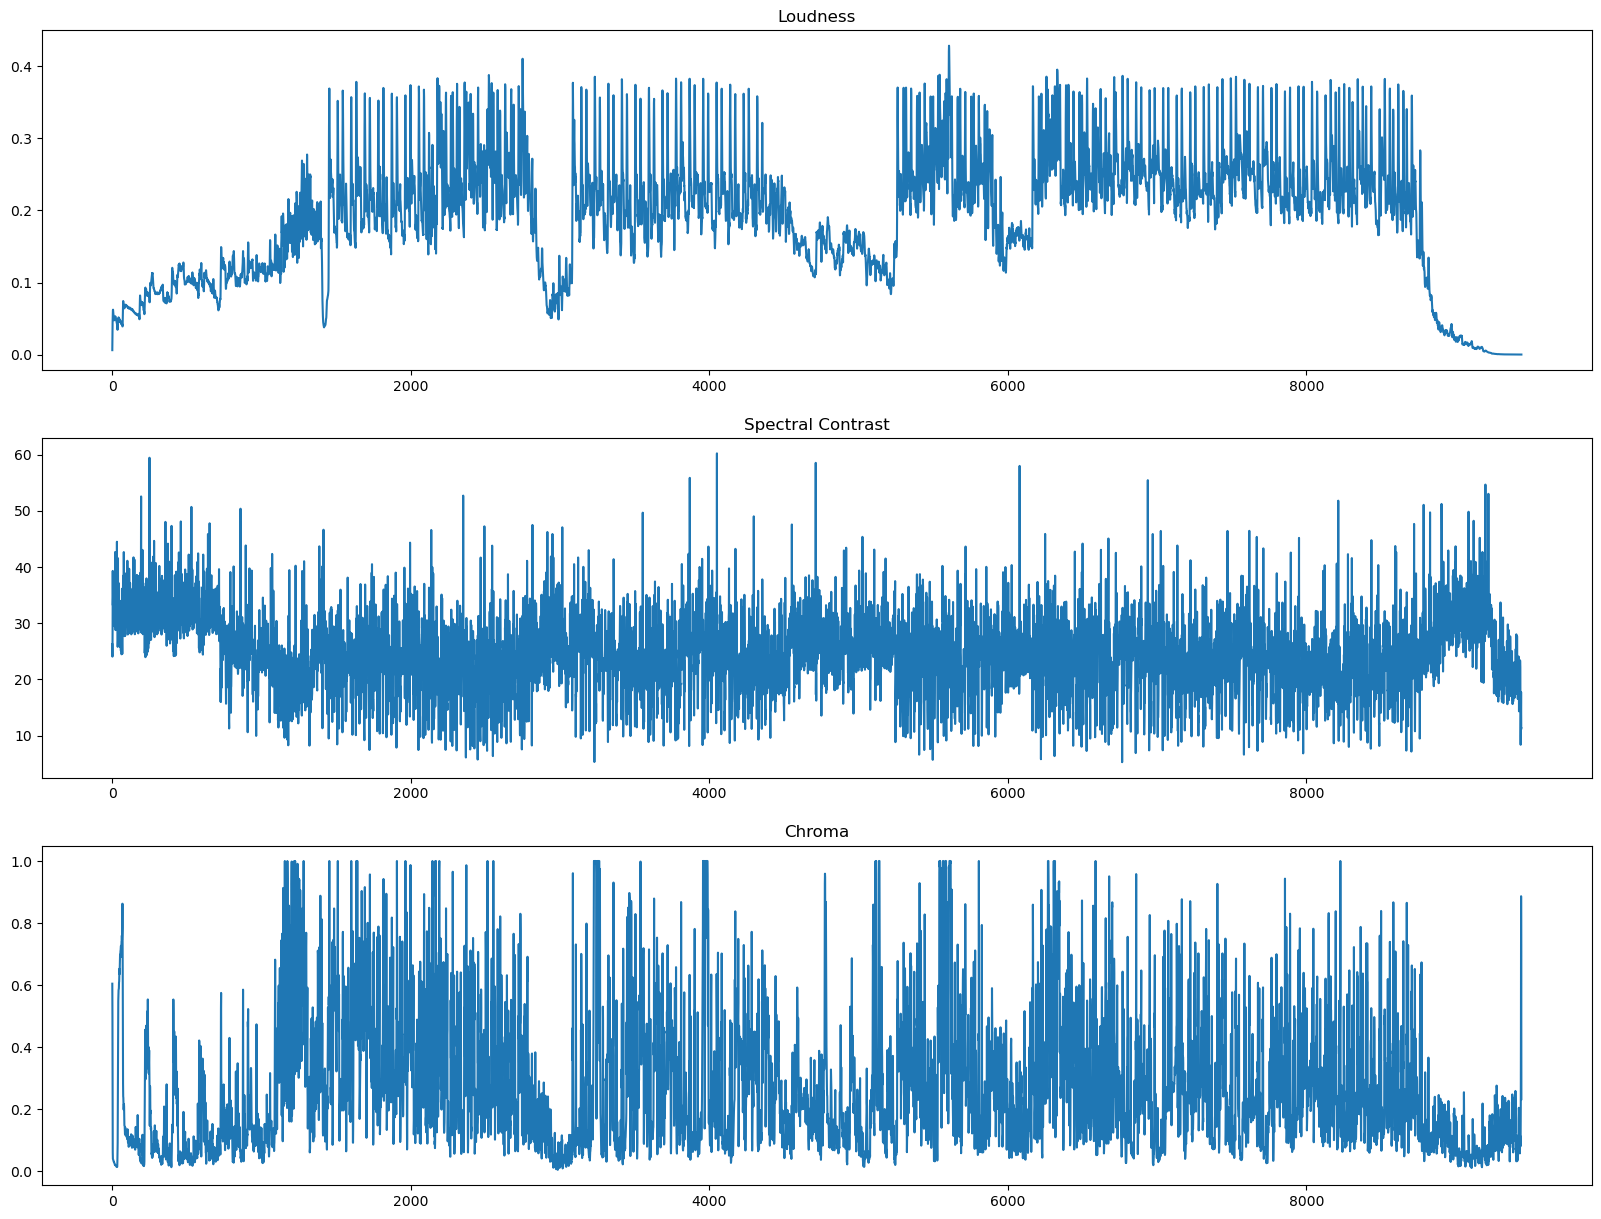

In [28]:
import torchaudio.functional as F
import librosa
intense_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/Hollow-Sun(chosic.com).mp3")
peace_sound = Path("/home/siyuan/class/cmsc734/sound_vis/sounds/relaxing-mountains-rivers-streams-running-water-18178.mp3")

# Load the audio file  
y, sr = librosa.load(intense_sound)  
  

# Extract the loudness  
loudness = librosa.feature.rms(y = y)  
# Extract the spectral contrast  
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)  
# Extract the chroma feature  
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 


# Plot the features  
plt.figure(figsize=(20, 15))  
plt.subplot(3, 1, 1)  
plt.plot(loudness[0])  
plt.title('Loudness')  
plt.subplot(3, 1, 2)  
plt.title('Spectral Contrast')
plt.plot(contrast[0]) 
plt.subplot(3, 1, 3)
plt.title('Chroma')
plt.plot(chroma[0]) 

# save image
plt.savefig('intense_sound.png')

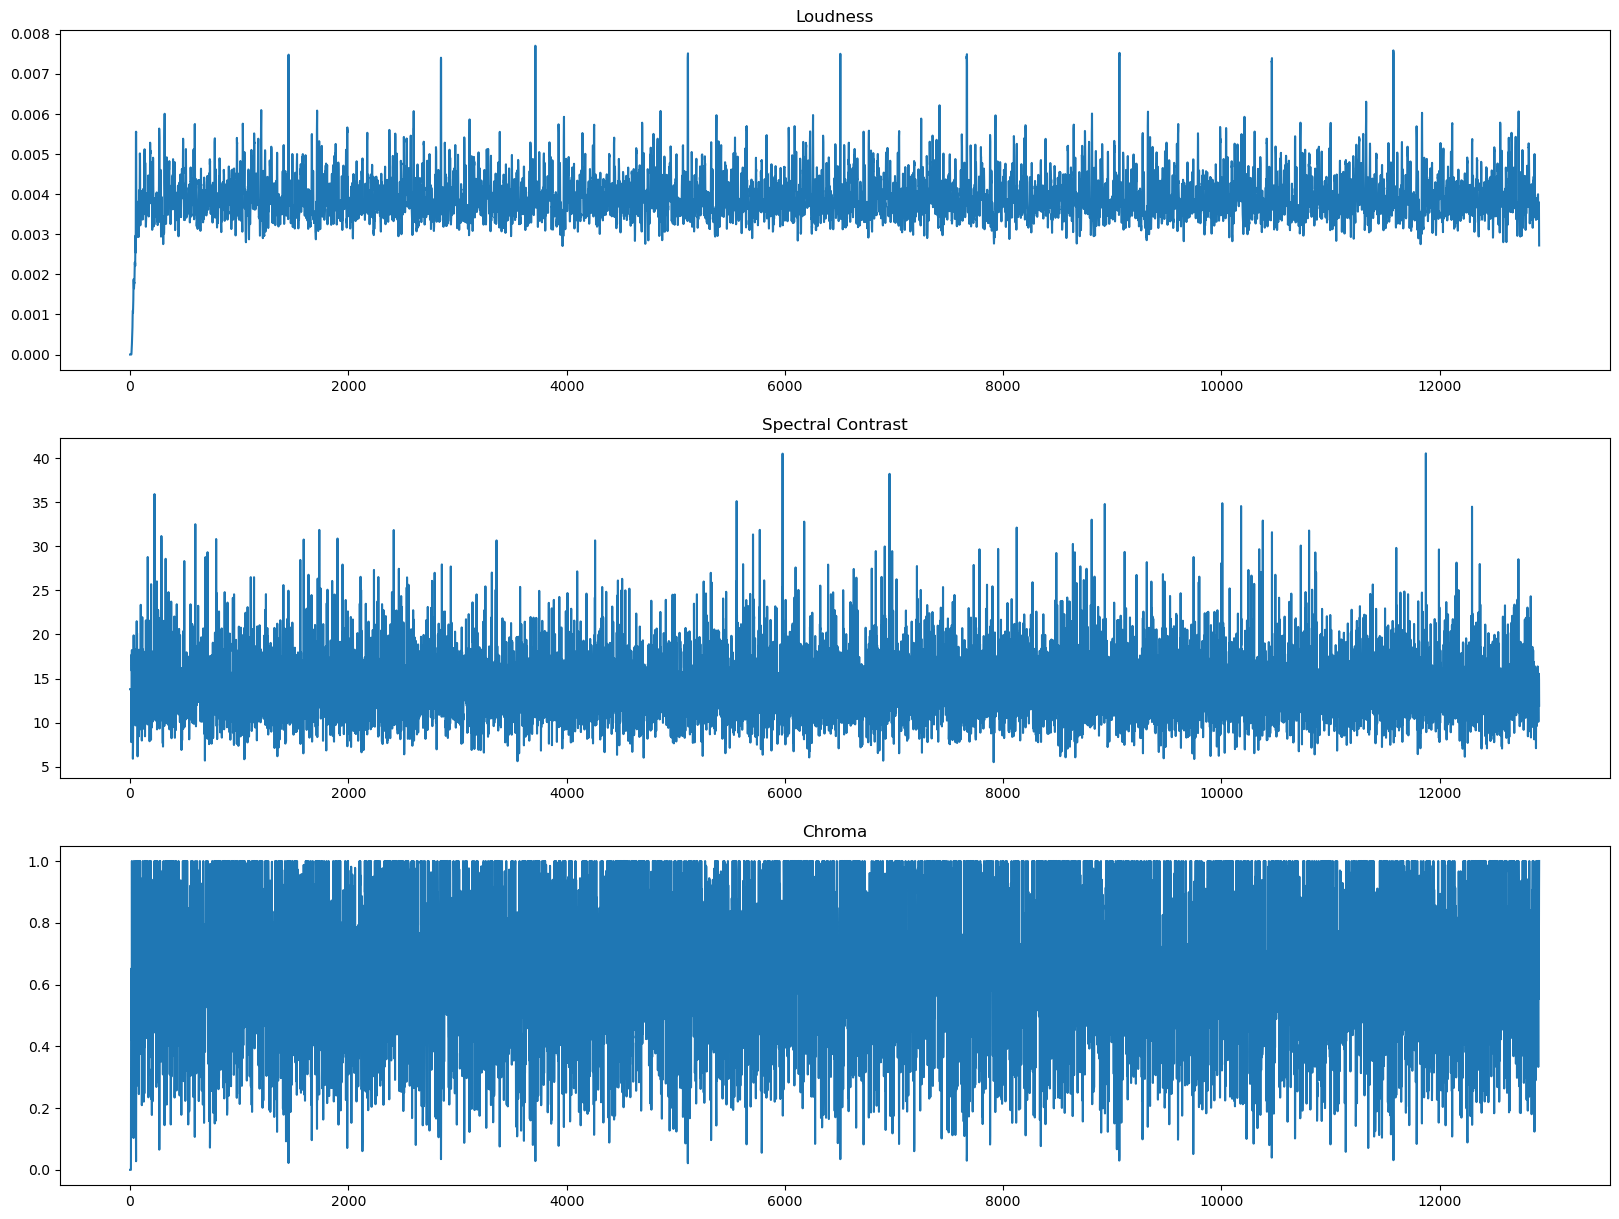

In [27]:


# Load the audio file  
y, sr = librosa.load(peace_sound)  
  

# Extract the loudness  
loudness = librosa.feature.rms(y = y)  
# Extract the spectral contrast  
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)  
# Extract the chroma feature  
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 


# Plot the features  
plt.figure(figsize=(20, 15))  
plt.subplot(3, 1, 1)  
plt.plot(loudness[0])  
plt.title('Loudness')  
plt.subplot(3, 1, 2)  
plt.title('Spectral Contrast')
plt.plot(contrast[0]) 
plt.subplot(3, 1, 3)
plt.title('Chroma')
plt.plot(chroma[0]) 
plt.savefig('peace_sound.png')